In [38]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data)
ride_data = pd.read_csv(ride_data)
city_data.info()

# Combine the data into a single dataset
pydata = pd.merge(city_data, ride_data, how='outer', on=['city'])

# Display the data table for preview
#pydata.describe()
pydata.info()
#ride_data.head()

pydata.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
city            120 non-null object
driver_count    120 non-null int64
type            120 non-null object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
city            2375 non-null object
driver_count    2375 non-null int64
type            2375 non-null object
date            2375 non-null object
fare            2375 non-null float64
ride_id         2375 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 129.9+ KB


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [39]:
pydata['type'].unique()


array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [40]:
pydata['ride_id'].count()

2375

## Bubble Plot of Ride Sharing Data

In [41]:
# Obtain the x and y coordinates for each of the three city types
cities = pydata.groupby(["city"])
#cities.head()
#total_rides_city = cities['ride_id'].count()
#total_rides_city
#total_fares_city = cities['fare'].value_counts()
#total_rides_city = cities['ride_id'].count()
total_drivers_city = cities['driver_count'].sum()
total_drivers_city

urban_data = pydata.loc[pydata['type']=='Urban',:]
urban_rides=urban_data.groupby('city')
urban_fares=urban_rides['fare'].mean()

urban_total_rides=urban_rides['ride_id'].count()
urban_drivers=(urban_rides['driver_count'].max())*10
urban_drivers.sum()





24050

In [42]:
total_drivers_city = cities['driver_count'].min()*10
total_drivers_city.sum()

29730

In [43]:
Suburban_data = pydata.loc[pydata['type']=='Suburban',:]

Suburban_rides=Suburban_data.groupby('city')
suburban_fares=Suburban_rides['fare'].mean()
#suburban_fares
suburban_total_rides=Suburban_rides['ride_id'].count()
suburban_total_rides
suburban_drivers=(Suburban_rides['driver_count'].max())*10
suburban_drivers.sum()


#suburban_drivers

4900

In [44]:
#rural_data = pydata.loc[pydata['type']=='Rural',:]
rural_data = pydata.loc[pydata['type']=='Rural',:]

rural_rides=rural_data.groupby('city')
rural_fares=rural_rides['fare'].mean()
#rural_fares
rural_total_rides=rural_rides['ride_id'].count()
#rural_total_rides
rural_drivers=(rural_rides['driver_count'].max())*10
rural_drivers.sum()
#rural_drivers

780

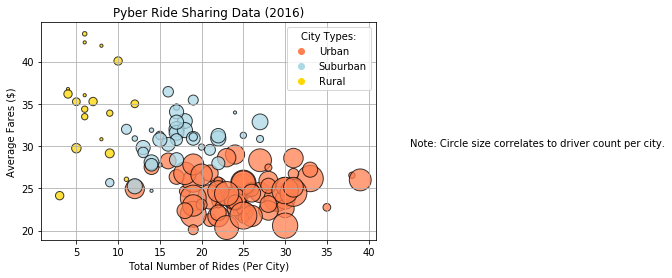

In [45]:

urban=plt.scatter(urban_total_rides, urban_fares, marker="o", c='coral', edgecolor="Black",
            s=urban_drivers, alpha=0.75)
suburban=plt.scatter(suburban_total_rides, suburban_fares, marker="o", c="lightblue", edgecolors="black",
            s=suburban_drivers, alpha=0.75)
rural=plt.scatter(rural_total_rides, rural_fares, marker="o", c="gold", edgecolors="black",
            s=rural_drivers, alpha=0.75)
plt.grid()


plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fares ($)")
plt.xlabel("Total Number of Rides (Per City)")

# legend handles
colors = ["coral", "lightblue", "gold"]
edge = ["black", "black", "black"]
cities = ["Urban", "Suburban", "Rural"]
handlelist = [plt.plot([], marker="o", ls="", color=color)[0] for color in colors]
plt.legend(handlelist,cities,title='City Types:',loc="best")
plt.text(45, 30, 'Note: Circle size correlates to driver count per city.', rotation=0)


plt.savefig("../Images/PyberScatter.png")
plt.show()
#plt.legend(title='City Types:',loc="best")
#plt.legend(title='Note: Circle size correlates to driver count per city.')

## Total Fares by City Type

In [46]:
# Calculate Type Percents
#pydata.describe()
#pydata.info()
total_fares = pydata['fare'].sum()
#total_fares
#ride_data.head()
rural_fares=rural_rides['fare'].sum()
rural_faresTTL = rural_fares.sum()
rural_faresTTL

suburban_fares=suburban_rides['fare'].sum()
suburban_faresTTL = suburban_fares.sum()
suburban_faresTTL

urban_fares=urban_rides['fare'].sum()
urban_faresTTL = urban_fares.sum()
urban_faresTTL
#pydata.head()
# Build Pie Chart

# Save Figure


39854.38000000001

In [47]:
urban_fare_percent = (urban_faresTTL/total_fares).round(2)
urban_fare_percent

0.63

In [48]:
suburban_fare_percent = (suburban_faresTTL/total_fares).round(2)
suburban_fare_percent

0.3

In [49]:
rural_fare_percent = (rural_faresTTL/total_fares).round(2)
rural_fare_percent

0.07

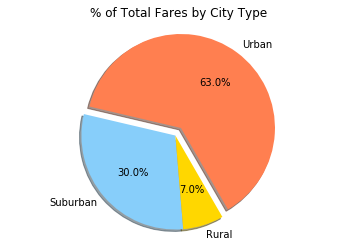

In [50]:
# Labels for the sections of our pie chart

labels = ["Urban", "Suburban", "Rural"]


# The values of each section of the pie chart
sizes = [urban_fare_percent, suburban_fare_percent, rural_fare_percent]



# The colors of each section of the pie chart

colors = ["coral", "lightskyblue", "gold"]


# Tells matplotlib to seperate the "Python" section from the others

explode = (0.1, 0, 0)

# Creates the pie chart based upon the values above

# Automatically finds the percentages of each part of the pie chart

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        
	autopct="%1.1f%%", shadow=True, startangle=300)

# Tells matplotlib that we want a pie chart with equal axes

plt.axis("equal")
plt.title("% of Total Fares by City Type")
plt.savefig("../Images/TotalFaresbyCity.png")
plt.show()

## Total Rides by City Type

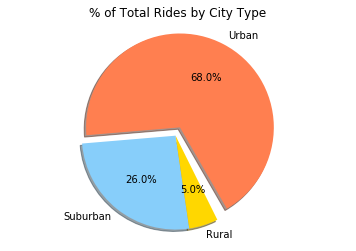

In [51]:
# Calculate Ride Percents
total_rides = pydata['ride_id'].value_counts()
rides_TTL = total_rides.sum()
rides_TTL


urban_total_rides=urban_rides['ride_id'].count()
urban_ride_TTL = urban_total_rides.sum()
TTL_urban = (urban_total_rides.sum()/rides_TTL).round(2)
TTL_urban

suburban_total_rides=suburban_rides['ride_id'].count()
suburban_ride_TTL = suburban_total_rides.sum()
TTL_suburban = (suburban_total_rides.sum()/rides_TTL).round(2)
TTL_suburban


rural_total_rides=rural_rides['ride_id'].count()
rural_ride_TTL = rural_total_rides.sum()
TTL_rural = (rural_total_rides.sum()/rides_TTL).round(2)
TTL_rural

# Build Pie Chart
# Labels for the sections of our pie chart

labels = ["Urban", "Suburban", "Rural"]


# The values of each section of the pie chart

sizes = [TTL_urban, TTL_suburban, TTL_rural]


# The colors of each section of the pie chart

colors = ["coral", "lightskyblue", "gold"]


# Tells matplotlib to seperate the "Python" section from the others

explode = (0.1, 0, 0)

# Creates the pie chart based upon the values above

# Automatically finds the percentages of each part of the pie chart

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        
	autopct="%1.1f%%", shadow=True, startangle=300)

# Tells matplotlib that we want a pie chart with equal axes

plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.savefig("../Images/TotalRidesbyCity.png")
plt.show()
# Save Figure


In [52]:
# Show Figure
plt.show()

## Total Drivers by City Type

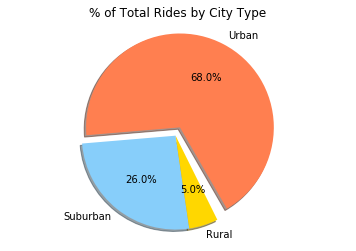

In [53]:
# Calculate Ride Percents
total_rides = pydata['ride_id'].value_counts()
rides_TTL = total_rides.sum()
rides_TTL


urban_total_rides=urban_rides['ride_id'].count()
urban_ride_TTL = urban_total_rides.sum()
TTL_urban = (urban_total_rides.sum()/rides_TTL).round(2)
TTL_urban

suburban_total_rides=suburban_rides['ride_id'].count()
suburban_ride_TTL = suburban_total_rides.sum()
TTL_suburban = (suburban_total_rides.sum()/rides_TTL).round(2)
TTL_suburban


rural_total_rides=rural_rides['ride_id'].count()
rural_ride_TTL = rural_total_rides.sum()
TTL_rural = (rural_total_rides.sum()/rides_TTL).round(2)
TTL_rural

# Build Pie Chart
# Labels for the sections of our pie chart

labels = ["Urban", "Suburban", "Rural"]


# The values of each section of the pie chart

sizes = [TTL_urban, TTL_suburban, TTL_rural]


# The colors of each section of the pie chart

colors = ["coral", "lightskyblue", "gold"]


# Tells matplotlib to seperate the "Python" section from the others

explode = (0.1, 0, 0)

# Creates the pie chart based upon the values above

# Automatically finds the percentages of each part of the pie chart

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        
	autopct="%1.1f%%", shadow=True, startangle=300)

# Tells matplotlib that we want a pie chart with equal axes

plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.savefig("../Images/TotalRidesbyCity.png")
plt.show()
# Save Figure


In [54]:
# Show Figure
plt.show()

In [56]:
total_drivers_city = cities['driver_count'].min()
total_drivers_city.sum()

TypeError: list indices must be integers or slices, not str

In [57]:
urban_drivers=(urban_rides['driver_count'].max())
urban_drivers.sum()

2405

In [58]:
suburban_drivers=(suburban_rides['driver_count'].max())
suburban_drivers.sum()


490

In [59]:
rural_drivers=(rural_rides['driver_count'].max())
rural_drivers.sum()

78

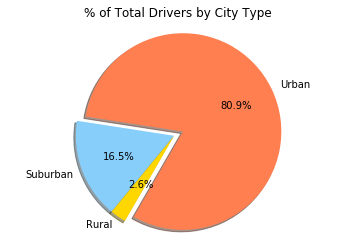

In [60]:
# Build Pie Chart
# Labels for the sections of our pie chart

labels = ["Urban", "Suburban", "Rural"]


# The values of each section of the pie chart

sizes = [urban_drivers.sum(), suburban_drivers.sum(), rural_drivers.sum()]


# The colors of each section of the pie chart

colors = ["coral", "lightskyblue", "gold"]


# Tells matplotlib to seperate the "Python" section from the others

explode = (0.1, 0, 0)

# Creates the pie chart based upon the values above

# Automatically finds the percentages of each part of the pie chart

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        
	autopct="%1.1f%%", shadow=True, startangle=240)

# Tells matplotlib that we want a pie chart with equal axes

plt.axis("equal")
plt.title("% of Total Drivers by City Type")
plt.savefig("../Images/TotalDriversbyCity.png")
plt.show()
# Save Figure


In [61]:
rural_fares_drivers = rural_faresTTL/rural_drivers.sum()
rural_fares_drivers
#rural_drivers.sum()

55.48628205128205

In [62]:
suburban_fares_drivers = suburban_faresTTL/suburban_drivers.sum()
suburban_fares_drivers

39.50271428571429

In [63]:
urban_fares_drivers = urban_faresTTL/urban_drivers.sum()
urban_fares_drivers

16.57146777546778

In [64]:
pydata['date'] : [np.min, np.max]
pydata['date'].min()

'2018-01-01 00:08:16'

In [65]:
pydata['date'].max()

'2018-05-08 13:10:18'

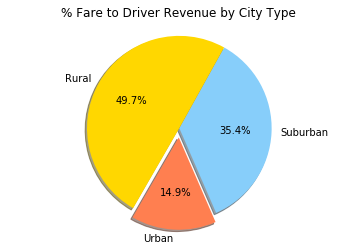

In [66]:
# Build Pie Chart
# Labels for the sections of our pie chart

labels = ["Urban", "Suburban", "Rural"]


# The values of each section of the pie chart

sizes = [urban_fares_drivers, suburban_fares_drivers, rural_fares_drivers]


# The colors of each section of the pie chart

colors = ["coral", "lightskyblue", "gold"]


# Tells matplotlib to seperate the "Python" section from the others

explode = (0.1, 0, 0)

# Creates the pie chart based upon the values above

# Automatically finds the percentages of each part of the pie chart

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        
	autopct="%1.1f%%", shadow=True, startangle=240)

# Tells matplotlib that we want a pie chart with equal axes

plt.axis("equal")
plt.title("% Fare to Driver Revenue by City Type")
plt.savefig("../Images/FaretoDriversbyCity.png")
plt.show()
# Save Figure
